# Iris Flower Dataset Neural Network 
##### **A Statquest implementation of [Neural Networks Pt. 4: Multiple Inputs and Outputs](https://www.youtube.com/watch?v=83LYR-1IcjA&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=9)**
##### **Also a implementation of [Neural Networks Part 5: ArgMax and SoftMax](https://youtu.be/KpKog-L9veg?si=ue6ZtYQ0npXg6O7t)**

![iris_dataset image.png](<./images/iris_dataset_image.png>)

In [ ]:
!pip install --quiet pandas scikit-learn numpy torch matplotlib

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/StatQuest/signa/main/chapter_04/iris.txt"

column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

iris = pd.read_csv(url, header=None, names=column_names)

iris = iris.drop(columns=["sepal_length", "petal_length"])
iris["species"] = iris["species"].str.replace("Iris-", "")
# Print 3 examples of each species
for s in iris["species"].unique():
    print(f"\n{s}:")
    print(iris[iris["species"] == s].head(3))
    print("-" * 50)

In [ ]:
sample_dataset = [iris.iloc[0], iris.iloc[1], iris.iloc[2],
                  iris.iloc[50], iris.iloc[51], iris.iloc[52],
                  iris.iloc[100], iris.iloc[101], iris.iloc[102]]
sample_dataset = pd.DataFrame(sample_dataset)
print("Indices of sample_dataset:", sample_dataset.index)
print(sample_dataset)

In [ ]:
# input nodes
petal_width = iris["petal_width"].values
sepal_width = iris["sepal_width"].values

# Combine petal_width and sepal_width into a 2D array
X = np.column_stack((petal_width, sepal_width)) 

# output nodes
species = iris["species"].values
label_encoder = LabelEncoder()
# output nodes encoded as integers, setosa = 0, versicolor = 1, virginica = 2
species_encoded = label_encoder.fit_transform(species) 
y = species_encoded
print(y) 
print("\n" + "="* 80)
# print(X)

In [ ]:
# Normalize the input features 0 to 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# print(X)

In [ ]:
# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# print(X_tensor)
# print(y_tensor)

### Standard Implementation of a Simple Model Architecture

In [ ]:
class IrirsNetSimple(nn.Module):
    def __init__(self, input_size=2, hidden_size=2, output_size=3):
        super(IrirsNetSimple, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

##### The test tensor is used to explain diffrent functions used in the ReLU and what it does

In [ ]:
test_tensor = torch.tensor([[1.0, 2.0, 3.0],[4.0, 5.0, 6.0]], dtype=torch.float32)
empty = torch.empty_like(test_tensor)
"""Fun Note:
The function torch.empty_like doesn't actually set values to zero—it
simply allocates memory for a tensor of the same shape and datatype,
leaving the contents uninitialized. This means that the tensor will
contain whatever values happen to be in that chunk of memory, which
can appear as random numbers. If you need a tensor initialized with
zeros, use torch.zeros_like instead."""
test_tensor_flatten = test_tensor.flatten()  # Flatten to 1D tensor
test_tensor_view = test_tensor_flatten.view(2,3)  # Reshape to 2D tensor(2,3 is orginal shape)
print("empty shape:", empty.shape)
print("empty:", empty)
print("="*80)
print("test_tensor shape:", test_tensor.shape)
print("test_tensor:", test_tensor)
print("="*80)
print("test_tensor_flatten shape:", test_tensor_flatten.shape)
print("test_tensor_flatten:", test_tensor_flatten)
print("="*80)
print("test_tensor_view shape:", test_tensor_view.shape)
print("test_tensor_view:", test_tensor_view)


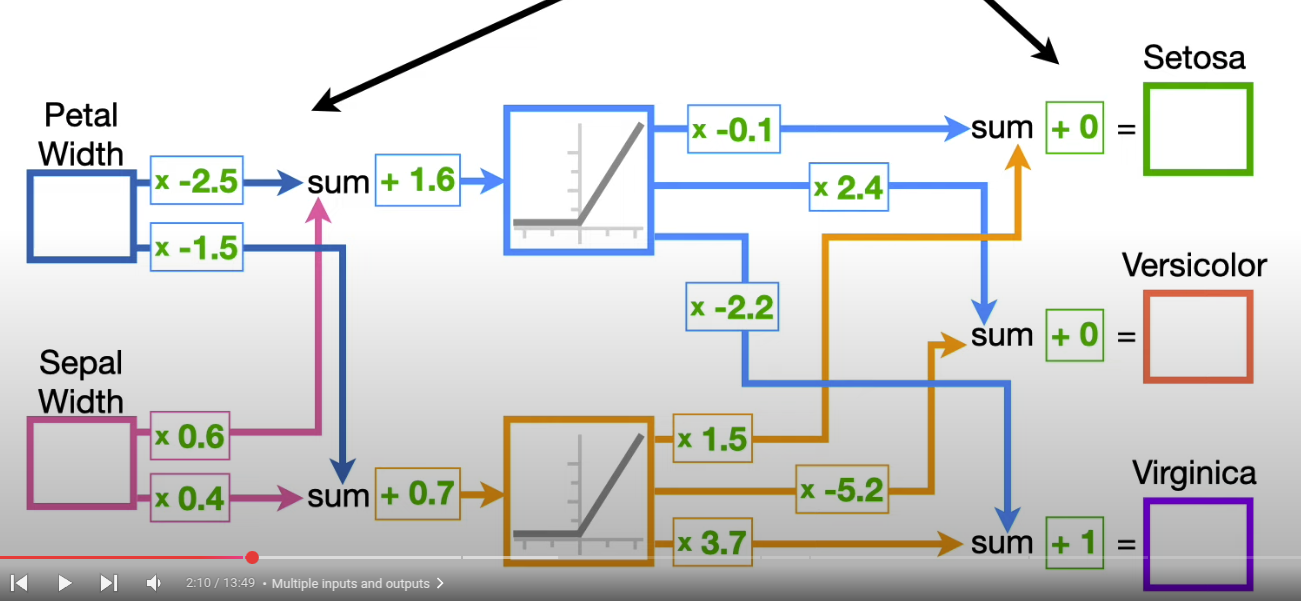

In [ ]:
# Define the neural network
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        # Initialize weights and biases for our custom linear layers

        self.weights1 = nn.Parameter(torch.tensor([
            [-2.5,  0.6],   # Hidden neuron 1
            [-1.5,  0.4]    # Hidden neuron 2
        ], dtype=torch.float32))

        self.bias1 = nn.Parameter(torch.tensor([1.6, 0.7], dtype=torch.float32))
        
        self.weights2 = nn.Parameter(torch.tensor([
            [-0.1,  1.5],
            [2.4,  -5.2],
            [ -2.2, 3.7]
        ], dtype=torch.float32))
        
        self.bias2 = nn.Parameter(torch.tensor([0.0,0.0, 1.0], dtype=torch.float32))
    
    def custom_relu(self, x):
        """Custom implementation of ReLU activation function"""
        print("ReLU activation")
        print("input of x before ReLU:", x)
        
        result = torch.empty_like(x) # Create an empty tensor with the same shape as x
        # Flatten both the tensors to 1D (A vector)
        x_flat = x.flatten()
        result_flat = result.flatten()
        # Iterate manually over each element
        for i in range(x_flat.size(0)):
            # If the element is positive, keep it; otherwise, set it to 0.
            result_flat[i] = x_flat[i] if x_flat[i] > 0 else 0.0
         
        # Reshape the result back to the original shape
        result = result_flat.view(x.shape)
        print("output of x after ReLU:", x)  
        print("-"*80)
        return result
    
    def custom_linear(self, x, weights, bias):
        """Custom implementation of linear transformation"""
        ## If you want to see the values for each step of the calculation, uncomment the print statements below
        print("x shape:", x)
        print("weights values:", weights)
        print("bias values:", bias)
        output_res = torch.matmul(x, weights.t()) + bias
        print("output_res shape:", output_res)
        print("-"*80)
        return output_res
    
    def forward(self, x):
        # First layer with custom linear and ReLU
        print("linear layer 1")
        x = self.custom_linear(x, self.weights1, self.bias1)
        
        x = self.custom_relu(x)
        
        # Second layer with custom linear
        print("linear layer 2")
        x = self.custom_linear(x, self.weights2, self.bias2)
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = IrisNet().to(device)

## Test the model with the sample data

In [ ]:
X_sample = np.column_stack((sample_dataset["petal_width"].values,
                            sample_dataset["sepal_width"].values))
y_sample = sample_dataset["species"].values
label_encoder = LabelEncoder()
y_sample_encoded = label_encoder.fit_transform(y_sample)

X_sample = scaler.fit_transform(X_sample)

X_sample_tensor = torch.tensor(X_sample, dtype=torch.float32)
y_sample_tensor = torch.tensor(y_sample_encoded, dtype=torch.long)

print("X_sample_tensor:", X_sample_tensor)
print("y_sample_tensor:", y_sample_tensor)

### Here we can see the math behind each step

In [ ]:
def manual_argmax(probabilities, dim = 1): # This argmax is only for 1 dim
    max_indices = [] # list to store the max indices (Predicted species)
    for row in probabilities: # Iterate over each row
        # each row looks like thisrow:  tensor([0.6871, 0.1059, 0.2070]) 
        max_index = 0
        for i in range(1, row.numel()): # compare each element to get the max index
            if row[i] > row[max_index]:
                max_index = i
        max_indices.append(max_index)
    return torch.tensor(max_indices)

In [ ]:
def manual_softmax(x, dim=1):
    """Custom implementation of softmax function"""
    print("input of x before softmax:", x)
    # Subtract the maximum value from each element for numerical stability
    x = x - torch.max(x)
    print("input of x after subtracting max value:", x)
    exp_x = torch.exp(x)  # Exponentiate each element using the exponential function on the tensor x
    sum_exp_x = torch.sum(exp_x, dim=dim, keepdim=True)  # Sum along the specified dimension
    softmax_output = exp_x / sum_exp_x  # Divide each exponentiated element by the sum
    print("output of x after softmax:", softmax_output)
    print("-"*80)
    return softmax_output

In [ ]:
with torch.no_grad():
    X_sample_tensor = X_sample_tensor.to(device)
    y_pred = model(X_sample_tensor).cpu()
    print("Predictions:")
    print(y_pred)
    print("Predictions shape:", y_pred.shape)

    # Get probabilities
    probabilities = manual_softmax(y_pred, dim=1) 
    print("Predicted labels (softmax):", probabilities)

    # Get the predicted class labels
    predicted_labels = manual_argmax(probabilities, dim=1)  

    print("Predicted labels:", predicted_labels)
    # Decode the predicted labels back to original species names
    predicted_species = label_encoder.inverse_transform(predicted_labels.numpy())
    print("Predicted species:", predicted_species)

### Get probablities on the full dataset

In [ ]:
import contextlib
import os

In [ ]:
# Use the full dataset for probability calculation
with contextlib.redirect_stdout(open(os.devnull, 'w')):
    with torch.no_grad():
        logits = model(X_tensor.to(device))
        probabilities = torch.softmax(logits, dim=1).cpu().numpy()

In [ ]:
# Create a figure with enough space for 2 rows
fig = plt.figure(figsize=(18, 10))

# Create scatter plots for each class probability
classes = ['Setosa', 'Versicolor', 'Virginica']
cmaps = ['Greens', 'Oranges', 'Purples']
colors = ['green', 'orange', 'purple']


# --- Top row of three subplots ---
for i, (cls, cmap) in enumerate(zip(classes, cmaps)):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    
    scatter = ax.scatter(
        X[:, 0], 
        X[:, 1], 
        probabilities[:, i],
        c=probabilities[:, i],
        cmap=cmap,
        s=50,
        alpha=0.8
    )
    
    ax.set_title(f'{cls} Probability')
    ax.set_xlabel('Petal Width')
    ax.set_ylabel('Sepal Width')
    ax.set_zlabel(f'Probability of {cls}')
    
    fig.colorbar(scatter, ax=ax)

# --- Bottom row: single combined subplot spanning all columns ---
ax = fig.add_subplot(2, 3, (4, 6), projection='3d')

# Predicted class (highest probability)
predicted_class = np.argmax(probabilities, axis=1)

# Plot each point colored by predicted class
for i, cls in enumerate(classes):
    mask = predicted_class == i
    if np.any(mask):
        ax.scatter(
            X[mask, 0], 
            X[mask, 1],
            np.max(probabilities[mask], axis=1), 
            color=colors[i], 
            label=cls, 
            s=80, 
            alpha=0.8
        )

ax.set_title('Combined Class Predictions')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Prediction Confidence')
ax.legend()

plt.tight_layout()
plt.show()